# PyVADesign Tutorial

Welcome to the PyVADesign tutorial! 

In this notebook, we will show some different use-cases for PyVADesign 

### Import required modules and packages

In [1]:
import os
from Bio import SeqIO

from src.mutation import Mutation
from src.sequence import Vector, Gene
from src.DNABlocks import DNABlockDesign
from src.primer import DesignPrimers
from src.plot import Plot

%reload_ext autoreload
%autoreload 2

### Load the vector sequence and the Gene of Interest

To successfully run the design process, the gene of interest must be provided in FASTA format and the plasmid sequence should be available in either DNA (.dna) or GenBank (.gb) format

For the purpose of this tutorial we will focus on Mycobacterial membrane protein Large 3 (MmpL3) of *Mycobacterium avium*. MmpL3 is a lipid transporter that has become a promising drug target for developing new anti-mycobacterial therapies. 

In [2]:
# Create a gene object and parse the gene sequence from the data directory

sequence_file = os.path.join('tutorial-data', 'A0A0H2ZYQ2.fasta')  # Gene sequence in fasta format
gene_instance = Gene(stopcodon=False)
gene_instance.parse_sequence(sequence_file)

# Show the gene sequence
print(len(gene_instance.sequence), gene_instance.sequence)

2274 atgAGTtaTcggtatcggtacatcgtgatcggggtcacggtagctctgtgcctgctcggcggcgttttcggcatcagcctgggcaagcacgtcacccagagcggcttctacgacgacgccagccagtccgtcaaggcgtcggtgctcggcgaccagacctacggccgcgaccgcaccagccacgtggtggccaccttcacgacgcccgacgggaaaaccgtcgacgacgcgggctggcgggacaaggtcgtcgccgagctgaacaagttcaaagccgaccaccccgaccaggtcgtcgggtgggccggctggctggcggcgccggacagcaccaacccggtgatcaagggcatggtcagcgaggacaagaagcacaccttcgtgtccatcccgctcaagggcgacgacgacgacaccatcctgaacaactacaaggccatcgccccggatatgcagaagctcaacggcggcgccgtgcagctcgctgggctggagccgatcgccaacgcgctgaccgggaccatcgccaccgaccagcgccgcatggaggtcctcgcggtgccgatggtggcggtggtgctgttcctggtgttcggcggcgcggtcgccgccggcctaccggccatcgtgggcggtctgagcatcgccggctcgctgggcatcctgcggctggtcgccgtgttcgggccggtgcactacttcgcccagccggtggtgtcgctgatcggcctgggcatcgcgatcgactacgggcttttcgtggtgagccggttccgggaggagatcgccgagggctacgacaccgaggccgcggtgcgaagaaccgtgatgacggccgggcgcacagtgacgttctcggccgtgctgatcatcgcgtcgagcgccagcctgctggtgttgccgcagggcttcgtgcactcactgacctacgccatcttcgccgcggtgggcctggccgcgctgctgtcgatcacgttcctgccggcctgcctggg

In [3]:
# Create a plasmid object and parse the input plasmid from the data directory

vector_file = os.path.join('tutorial-data', 'pACE_mmpL3-Mav.dna')  # Vector sequence including MmpL3 in dna format
vector_instance = Vector(gene=gene_instance)
vector_instance.parse_vector(vector_file)

# Show the vector sequence
print(vector_instance.vector.seq)

ttgagatcctttttttctgcgcgtaatctgctgcttgcaaacaaaaaaaccaccgctaccagcggtggtttgtttgccggatcaagagctaccaactctttttccgaaggtaactggcttcagcagagcgcagataccaaatactgtccttctagtgtagccgtagttaggccaccacttcaagaactctgtagcaccgcctacatacctcgctctgctaatcctgttaccagtggctgctgccagtggcgataagtcgtgtcttaccgggttggactcaagacgatagttaccggataaggcgcagcggtcgggctgaacggggggttcgtgcacacagcccagcttggagcgaacgacctacaccgaactgagatacctacagcgtgagctatgagaaagcgccacgcttcccgaggggagaaaggcggacaggtatccggtaagcggcagggtcggaacaggagagcgcacgagggagcttccagggggaaacgcctggtatctttatagtcctgtcgggtttcgccacctctgacttgagcgtcgatttttgtgatgctcgtcaggggggcggagcctatggaaaaacgccagcaacgcggcctttttacggttcctggccttttgctggccttttgctcacatgttctttcctgcgttatcccctgattctgtggataaccgtattaccgcctttgagtgagctgataccgctcgccgcagccgaacgaccgagcgcaacgcgtgcggccgcacgcgtgagcccaccagctccgtaagttcgggcgctgtgtggctcgtacccgcgcattcaggcggcagggggtctaacgggtctaaggcggcgtgtacggccgccacagcggctctcagcggcccggaaacgtcctcgaaacgacgcatgtgttcctcctggttggtacaggtggttgggggtgctcggctgtcgctggtgttccaccaccagggctcgacgggagagcgggggagtgtgcag

# Example 1: Site-saturation mutagenesis at three different residue positions (T506, V187, L433)

In [11]:
# Create the mutation file

mutations_file = os.path.join('tutorial-data', '02_design-examples', 'SSM', 'SSM-mutations.txt')  # Mutation file in txt format

residues = ['V187', 'L433', 'T506']
amino_acids = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']

with open(mutations_file, 'w') as f:
    for residue in residues:
        for aa in amino_acids:
            if not (aa == residue[0]):
                f.write(f"{residue}{aa}\n")

print(f"Mutations file created: {mutations_file}")

Mutations file created: tutorial-data\02_design-examples\SSM\SSM-mutations.txt


In [12]:
# Create a Mutation object and parse the input mutations from the file

mutation_instance = Mutation()
mutation_instance.parse_mutations(mutations_file)

# Print the mutations that were parsed

mutation_instance.print_mutations()

The selected mutations are:
	Mutation  	V187A     
	Mutation  	V187C     
	Mutation  	V187D     
	Mutation  	V187E     
	Mutation  	V187F     
	Mutation  	V187G     
	Mutation  	V187H     
	Mutation  	V187I     
	Mutation  	V187K     
	Mutation  	V187L     
	Mutation  	V187M     
	Mutation  	V187N     
	Mutation  	V187P     
	Mutation  	V187Q     
	Mutation  	V187R     
	Mutation  	V187S     
	Mutation  	V187T     
	Mutation  	V187W     
	Mutation  	V187Y     
	Mutation  	L433A     
	Mutation  	L433C     
	Mutation  	L433D     
	Mutation  	L433E     
	Mutation  	L433F     
	Mutation  	L433G     
	Mutation  	L433H     
	Mutation  	L433I     
	Mutation  	L433K     
	Mutation  	L433M     
	Mutation  	L433N     
	Mutation  	L433P     
	Mutation  	L433Q     
	Mutation  	L433R     
	Mutation  	L433S     
	Mutation  	L433T     
	Mutation  	L433V     
	Mutation  	L433W     
	Mutation  	L433Y     
	Mutation  	T506A     
	Mutation  	T506C     
	Mutation  	T506D     
	Mutation  	T506E     
	Mutat

In [10]:
# count number of mutations per type

num_point_mutations = [i.type == 'Mutation' for i in mutation_instance.mutations].count(True)
print(f'Number of point mutations: {num_point_mutations}')

Number of point mutations: 57


### Design dsDNA fragments and visualize the fragment regions

Next, we create an instance of DNABlockDesign that can initiate the design of the dsDNA fragments. 
<br>
<br>
For the design instance to run we need to provide the parsed mutations, the vector and gene, and optionally the settings.
We choose as optimization method amount_optimization that aims to use as little fragment regions as possible. Another option would be to do cost_optimization, that aims to use as few bp as possible, which usually leads to a higher number of different fragment regions
<br>


In [13]:
# we use a settingsfile that contains input parameters for the design class, such as the minimum and maximum length of the dsDNA fragments

settingsfile = os.path.join('tutorial-data', '01_base-tutorial', 'dsDNA-Design-settings-AmountOpt.txt')

# Create an DNABlockDesign object based on the input mutations and the gene sequence

design_instance = DNABlockDesign(mutation_instance=mutation_instance,
                                 vector_instance=vector_instance,
                                 gene_instance=gene_instance,
                                 settings_file=settingsfile,
                                 output_dir='tutorial-data/02_design-examples/SSM')

Now we can run the design method to generate the dsDNA fragments

In [14]:
design_instance.run_design_DNABlocks()

Settings for DNABlockDesign:
		output_dir           : tutorial-data/02_design-examples/SSM
		settings_file        : tutorial-data\01_base-tutorial\dsDNA-Design-settings-AmountOpt.txt
		cost_optimization    : False
		amount_optimization  : True
		clone_files          : True
		verbose              : True
		codon_usage          : U00096
		bp_price             : 0.05
		max_DNABlock_length  : 1500
		min_DNABlock_length  : 300
		min_overlap          : 25
		min_order            : 24
		cost                 : -1
		silent_mutations     : True
		silent_mutation_index: 30


Calculating relative codon frequencies, based on the selected genome id U00096
Clustering mutations on gene of interest using K-medioids clustering
Optimizing based on number of fragment regions
Starting dsDNA fragment design
Completed dsDNA fragment design. 

Clone files (.dna/.gb/.gff3) per input mutation stored in tutorial-data/02_design-examples/SSM\clones
CSV file with all dsDNA fragments stored in tutorial-data/02_design-

Visualize the fragment regions on the Gene of Interest

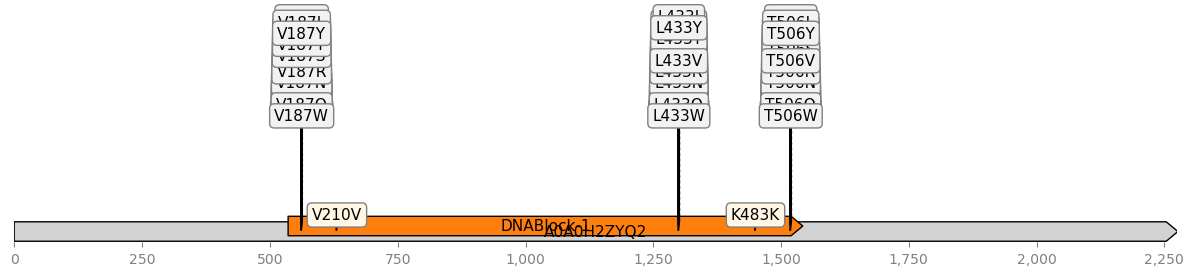

In [ ]:
# Now that we have designed the fragment regions, we can visualize them using the Plot class

plot_instance = Plot(DNABlocks_design_instance=design_instance,
                     output_dir=design_instance.output_dir,
                     gene_instance=gene_instance,
                     mutation_instance=mutation_instance,
                     vector_instance=vector_instance,
                     show=True)

plot_instance.plot_DNABlocks_mutations(figure_length=15,
                                       figure_width=3)

You can see that all mutations fall within the same fragment region, meaning that they can all be made using a single PCR and insertion step

# Example 2: Create random paired-mutations in a defined region of the protein

In this example we want to create N random mutations per variant, for M variants in a defined region of the protein

In [36]:
import random

def random_multiple_mutation(residues, n, max_distance_between_mutants=50, number_mutations=5, aas=['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']):
    """
    Randomly select multiple mutations in a protein sequence that will be combined in one mutant.

    Parameters
    ----------
    residues : list
        List of residues in the protein sequence
    aas : list
        List of all natural amino acids
    n : int
        Number of mutations to sample
    max_distance_between_mutants : int
        Maximum distance (in residues) between the two mutations, default is set to 50
    """
    mutants = []
    res1 = random.sample(residues, n)
    var1 = random.choices(aas, k=n) 
    mut1 = [i + j for i, j in zip(res1, var1)]

    for i in mut1:
        temp_muts = []
        other_positions = [r for r in residues if r != i[:-1]]
        sampled_positions = random.sample(other_positions, number_mutations)
        vars_x = random.choices(aas, k=number_mutations)
        for res, aa in zip(sampled_positions, vars_x):
            mut_x = res + aa
            temp_muts.append(mut_x)
        mutants.append(i + '-' + '-'.join(temp_muts))

    return mutants

In [48]:
# Convert nucleotide sequence to protein sequence

residues = []
protein_sequence = gene_instance.sequence.translate()

for num, i in enumerate(protein_sequence, start=1):
    residues.append(i + str(num))

# Generate random mutations
# we want to create 5 random mutations per variant
n = 5
# We want to create 10 variants
num_variants = 10
# We want to make these mutations in the region between G50 and R80
start = 49
end = 79
region = residues[start:end]

mutants = random_multiple_mutation(residues=region,
                                   n=num_variants,
                                   number_mutations=n)


# Save the mutants to a file
mutations_file = os.path.join('tutorial-data', '02_design-examples', 'random-paired-mutations', 'random-mutations.txt')

with open(mutations_file, 'w') as f:
    for mutant in mutants:
        f.write(f"Combined {mutant}\n")

# Read mutations from the file

mutation_instance = Mutation()
mutation_instance.parse_mutations(mutations_file)

# Print the mutations that were parsed

mutation_instance.print_mutations()

The selected mutations are:
	Combined  	G50L, D57T, R56W, T53L, A77M, S60W
	Combined  	Q52T, K72T, G78Q, A77R, T67Y, G50L
	Combined  	R58I, R56H, S60R, V74W, D57I, G50F
	Combined  	S60V, D70G, T67S, D57G, T65Q, W79I
	Combined  	H61T, D51T, T67D, P69A, G50N, R58D
	Combined  	T68F, D75F, R58N, T59W, Q52Y, T67P
	Combined  	D70W, D57D, G55E, K72N, T59K, T67N
	Combined  	K72K, T59F, V74D, V63D, D76L, P69L
	Combined  	V74Q, W79P, Q52K, T53R, D57K, R58H
	Combined  	W79H, G55T, T59R, A64D, T53N, V74R


In [49]:
settingsfile = os.path.join('tutorial-data', '01_base-tutorial', 'dsDNA-Design-settings-AmountOpt.txt')

# Create an DNABlockDesign object based on the input mutations and the gene sequence

design_instance = DNABlockDesign(mutation_instance=mutation_instance,
                                 vector_instance=vector_instance,
                                 gene_instance=gene_instance,
                                 settings_file=settingsfile,
                                 output_dir='tutorial-data/02_design-examples/random-paired-mutations')

design_instance.run_design_DNABlocks()

Settings for DNABlockDesign:
		output_dir           : tutorial-data/02_design-examples/random-paired-mutations
		settings_file        : tutorial-data\01_base-tutorial\dsDNA-Design-settings-AmountOpt.txt
		cost_optimization    : False
		amount_optimization  : True
		clone_files          : True
		verbose              : True
		codon_usage          : U00096
		bp_price             : 0.05
		max_DNABlock_length  : 1500
		min_DNABlock_length  : 300
		min_overlap          : 25
		min_order            : 24
		cost                 : -1
		silent_mutations     : True
		silent_mutation_index: 30


Loading relative codon frequencies from file
Clustering mutations on gene of interest using K-medioids clustering
Optimizing based on number of fragment regions
Starting dsDNA fragment design
Completed dsDNA fragment design. 

Clone files (.dna/.gb/.gff3) per input mutation stored in tutorial-data/02_design-examples/random-paired-mutations\clones
CSV file with all dsDNA fragments stored in tutorial-data/02_d

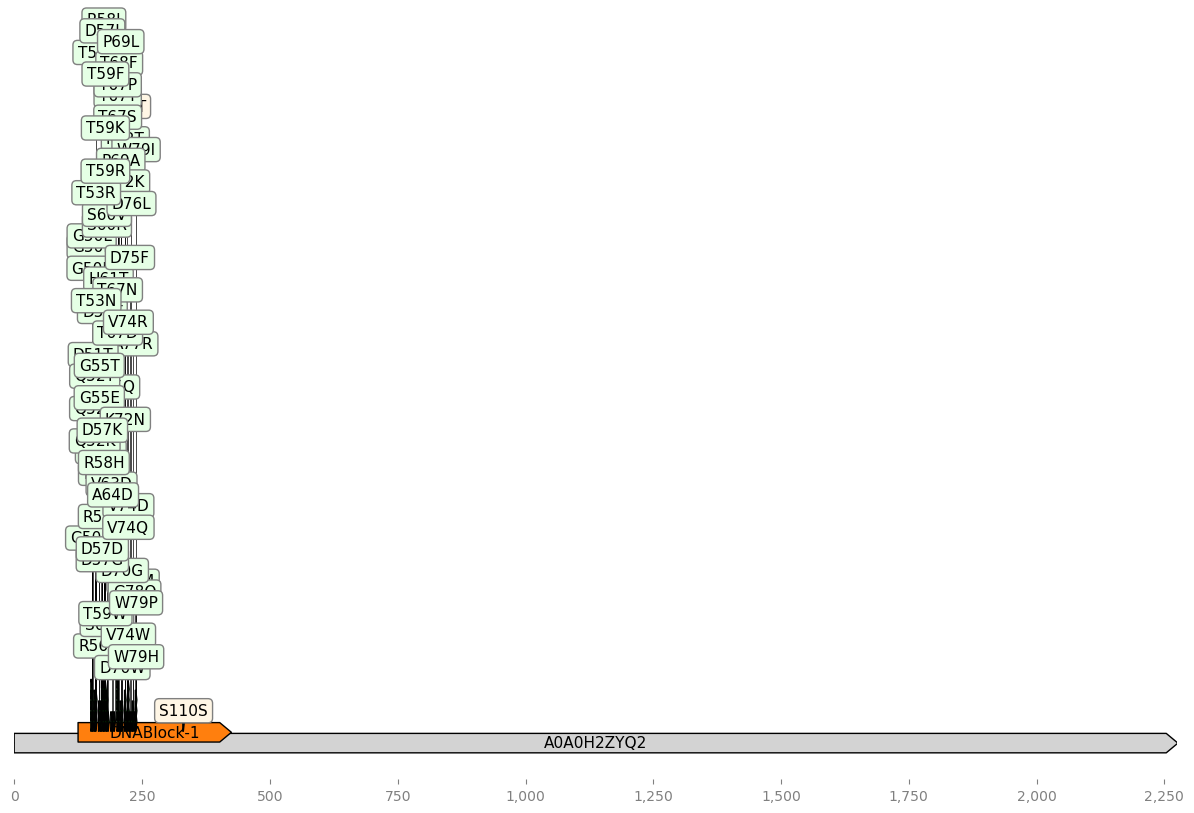

In [50]:
# Now that we have designed the eblocks, we can visualize them using the Plot class

plot_instance = Plot(DNABlocks_design_instance=design_instance,
                     output_dir=design_instance.output_dir,
                     gene_instance=gene_instance,
                     mutation_instance=mutation_instance,
                     vector_instance=vector_instance,
                     show=True)

plot_instance.plot_DNABlocks_mutations(figure_length=15,
                                       figure_width=10)